In [1]:
import numpy as np
import pandas as pd

In [3]:
# Reading files stored in EC2 memory
#books_ratings = pd.read_csv('../ratings_Books.csv', header=None)

In [4]:
#books_ratings.columns = ['UserID','ItemID','rating','Timestamp']

In [5]:
#books_ratings.head(5)

In [2]:
pip install --upgrade pip 


The following command must be run outside of the IPython shell:

    $ pip install --upgrade pip 

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [3]:
# Reading json data files from S3 using lazyread
# import boto3
# from lazyreader import lazyread
# client = boto3.client('s3')
# s3_object = client.get_object(Bucket='santhoshi-sparkle', Key='amazon-data/s3-test.json')
# body = s3_object['Body']

# for doc in lazyread(body, delimiter=b'\n'):
#     print(doc)

In [4]:
import sys
!{sys.executable} -m pip install --upgrade pip
!{sys.executable} -m pip install lazyreader

Requirement already up-to-date: pip in /home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages (18.0)


In [5]:
!{sys.executable} -m pip install smart_open

In [6]:
from smart_open import smart_open

In [10]:
# Reding csv file from S3 and converting it into dataframe
#initial_df = pd.read_csv(smart_open('s3://santhoshi-sparkle/amazon-data/ratings_Clothing_Shoes_and_Jewelry.csv'), header = None)

In [8]:

#initial_df.columns = ['UserID','ItemID','rating','Timestamp']

In [9]:
#initial_df['Timestamp'] = pd.to_datetime(initial_df.Timestamp,unit='s')

In [25]:
#initial_df['new'] = initial_df['Timestamp'].dt.date
#initial_df.info()

In [26]:
#initial_df.head(5)
#new_df = initial_df.drop('Timestamp', axis = 1)

In [27]:
#reviews_df = initial_df.drop_duplicates(subset=['UserID', 'ItemID','Timestamp'],inplace=True)
#missings = new_df.isnull().sum()

In [28]:
# initial_df.shape
# missings

In [29]:
#new_df.head(10).T

In [35]:
import ast

In [17]:
# Reading meta_Clothing_Shoes_and_Jewelry data into   EC2 console
import json
import ast 
records = []
count = 1
for line in smart_open('s3://santhoshi-sparkle/amazon-data/meta_Clothing_Shoes_and_Jewelry.json'):
    mydict = ast.literal_eval(line.decode("utf-8"))
    count = count + 1
    records.append(mydict)
    if count > 1000000:
        break
 

In [20]:
#records

In [18]:
# Converting list of dictionaries to dataframe
meta_Clothing_Shoes_and_Jewelry_df = pd.DataFrame(records)

In [19]:
meta_Clothing_Shoes_and_Jewelry_df.head(5).T

,0,1,2,3,4
asin,0000037214,0000031887,0123456479,0456844570,0456808574
brand,Big Dreams,Boutique Cutie,NaN,NaN,NaN
categories,"[[Clothing, Shoes & Jewelry, Girls], [Clothing...","[[Clothing, Shoes & Jewelry, Girls, Clothing, ...","[[Clothing, Shoes & Jewelry, Novelty, Costumes...","[[Clothing, Shoes & Jewelry, Women, Accessorie...","[[Clothing, Shoes & Jewelry, Women, Accessorie..."
description,NaN,This adorable basic ballerina tutu is perfect ...,Elegance par excellence. Hand-crafted of the f...,NaN,NaN
imUrl,http://ecx.images-amazon.com/images/I/31mCncNu...,http://ecx.images-amazon.com/images/I/314qZjYe...,http://ecx.images-amazon.com/images/I/413tGhqo...,http://ecx.images-amazon.com/images/I/31QZTHxv...,http://ecx.images-amazon.com/images/I/31UsrgT5...
price,6.99,6.79,64.98,NaN,NaN
related,"{'also_viewed': ['B00JO8II76', 'B00DGN4R1Q', '...","{'also_bought': ['0000031852', '0000031895', '...","{'also_bought': ['B000BMTCK6', 'B0006JCGUM', '...","{'also_viewed': ['B008MTRT1O', 'B00BUG47S4', '...","{'also_viewed': ['B00A6JD8EA', 'B00BFL4FTA', '..."
salesRank,{'Clothing': 1233557},{'Sports &amp; Outdoors': 8547},{'Kitchen & Dining': 16987},{'Clothing': 1180499},{'Clothing': 1038084}
title,Purple Sequin Tiny Dancer Tutu Ballet Dance Fa...,Ballet Dress-Up Fairy Tutu,SHINING IMAGE HUGE PINK LEATHER JEWELRY BOX / ...,RiZ Women's Beautify Crafted &frac12; Rimmed F...,Lantin White Visor Wrap Around Ski Style Aviat...


In [20]:
meta_Clothing_Shoes_and_Jewelry_df.shape

(1000000, 9)

In [21]:
#Writing dataframes to csv and dump in S3 
import boto3
from io import StringIO

csv_buffer = StringIO()
meta_Clothing_Shoes_and_Jewelry_df.to_csv(csv_buffer)
s3_resource = boto3.resource('s3')
s3_resource.Object('santhoshi-sparkle', 'amazon-data/meta_Clothing_Shoes_and_Jewelry_df.csv').put(Body=csv_buffer.getvalue())

{'ResponseMetadata': {'RequestId': 'F20FCDE75999264D',
  'HostId': 'B4DfPTKLPkPY8BfeubbQK3Ywv9lTPzy6G7WUbZ9X0/ZTkBChAwPQb6qtAUWkKV87u3ubNNjPnW8=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'B4DfPTKLPkPY8BfeubbQK3Ywv9lTPzy6G7WUbZ9X0/ZTkBChAwPQb6qtAUWkKV87u3ubNNjPnW8=',
   'x-amz-request-id': 'F20FCDE75999264D',
   'date': 'Sat, 04 Aug 2018 18:02:09 GMT',
   'etag': '"63b8691ee8c3c9d7c6b4fcb2e4df4f94"',
   'content-length': '0',
   'server': 'AmazonS3'},
  'RetryAttempts': 0},
 'ETag': '"63b8691ee8c3c9d7c6b4fcb2e4df4f94"'}

In [18]:
# Reading csv from S3
meta_Clothing_Shoes_and_Jewelry_df = pd.read_csv(smart_open('s3://santhoshi-sparkle/amazon-data/meta_Clothing_Shoes_and_Jewelry_df.csv'))

In [11]:
meta_Clothing_Shoes_and_Jewelry_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
Unnamed: 0     1000000 non-null int64
asin           1000000 non-null object
brand          70961 non-null object
categories     1000000 non-null object
description    66255 non-null object
imUrl          999923 non-null object
price          344625 non-null float64
related        622429 non-null object
salesRank      941910 non-null object
title          999396 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 76.3+ MB


In [12]:
#meta_reviews_df = meta_Clothing_Shoes_and_Jewelry_df.drop_duplicates(subset=['UserID', 'ItemID','Timestamp'],inplace=True)
## We use meta data for Content-based filtering

In [13]:
meta_Clothing_Shoes_and_Jewelry_df.head(5).T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
asin,0000037214,0000031887,0123456479,0456844570,0456808574
brand,Big Dreams,Boutique Cutie,NaN,NaN,NaN
categories,"[['Clothing, Shoes & Jewelry', 'Girls'], ['Clo...","[['Clothing, Shoes & Jewelry', 'Girls', 'Cloth...","[['Clothing, Shoes & Jewelry', 'Novelty, Costu...","[['Clothing, Shoes & Jewelry', 'Women', 'Acces...","[['Clothing, Shoes & Jewelry', 'Women', 'Acces..."
description,NaN,This adorable basic ballerina tutu is perfect ...,Elegance par excellence. Hand-crafted of the f...,NaN,NaN
imUrl,http://ecx.images-amazon.com/images/I/31mCncNu...,http://ecx.images-amazon.com/images/I/314qZjYe...,http://ecx.images-amazon.com/images/I/413tGhqo...,http://ecx.images-amazon.com/images/I/31QZTHxv...,http://ecx.images-amazon.com/images/I/31UsrgT5...
price,6.99,6.79,64.98,NaN,NaN
related,"{'also_viewed': ['B00JO8II76', 'B00DGN4R1Q', '...","{'also_bought': ['0000031852', '0000031895', '...","{'also_bought': ['B000BMTCK6', 'B0006JCGUM', '...","{'also_viewed': ['B008MTRT1O', 'B00BUG47S4', '...","{'also_viewed': ['B00A6JD8EA', 'B00BFL4FTA', '..."
salesRank,{'Clothing': 1233557},{'Sports &amp; Outdoors': 8547},{'Kitchen & Dining': 16987},{'Clothing': 1180499},{'Clothing': 1038084}
title,Purple Sequin Tiny Dancer Tutu Ballet Dance Fa...,Ballet Dress-Up Fairy Tutu,SHINING IMAGE HUGE PINK LEATHER JEWELRY BOX / ...,RiZ Women's Beautify Crafted &frac12; Rimmed F...,Lantin White Visor Wrap Around Ski Style Aviat...


In [10]:
# Reading reviews_Clothing_Shoes_and_Jewelry data into   EC2 console
import json
import ast 
records1 = []
count = 1
for line in smart_open('s3://santhoshi-sparkle/amazon-data/reviews_Clothing_Shoes_and_Jewelry.json'):
    mydict = ast.literal_eval(line.decode("utf-8"))
    count = count + 1
    records1.append(mydict)
    if count > 5700000:
        break

In [22]:
#records1

In [23]:
reviews_Clothing_Shoes_and_Jewelry_df = pd.DataFrame(records1)

In [24]:
reviews_Clothing_Shoes_and_Jewelry_df.head(5).T

,0,1,2,3,4
asin,0000031887,0000031887,0000031887,0000031887,0000031887
helpful,"[0, 0]","[1, 1]","[1, 1]","[0, 1]","[0, 0]"
overall,5,4,2,1,4
reviewText,Perfect red tutu for the price. I baught it as...,This was a really cute tutu the only problem i...,the tutu color was very nice. the only issue w...,My 3-yr-old daughter received this as a gift f...,Bought it for my daughters first birthday whic...
reviewTime,"11 4, 2013","05 26, 2012","02 17, 2013","03 21, 2013","01 23, 2014"
reviewerID,A2XVJBSRI3SWDI,A2G0LNLN79Q6HR,A2R3K1KX09QBYP,A19PBP93OF896,A1P0IHU93EF9ZK
reviewerName,abigail,"aj_18 ""Aj_18""",alert consumer,"Alinna Satake ""Can't Stop Eating""",Amanda
summary,Nice tutu,Really Cute but rather short.,not very good material.,Tiny and Poorly Constructed!,i love it
unixReviewTime,1383523200,1337990400,1361059200,1363824000,1390435200


In [25]:
reviews_Clothing_Shoes_and_Jewelry_df.shape

(2000000, 9)

In [78]:
#Writing dataframes to csv and dump in S3 
import boto3
from io import StringIO

csv_buffer = StringIO()
reviews_Clothing_Shoes_and_Jewelry_df.to_csv(csv_buffer)
s3_resource = boto3.resource('s3')
s3_resource.Object('santhoshi-sparkle', 'amazon-data/reviews_Clothing_Shoes_and_Jewelry_df.csv').put(Body=csv_buffer.getvalue())

{'ResponseMetadata': {'RequestId': '10838E8AA9334743',
  'HostId': '+l9DSC9IqR+3ZBRtVDNlpq8rohNihZVrAvgzM99vfsvT3S1vBmi5NCFJ82R0WPQqoFpEluNgysw=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': '+l9DSC9IqR+3ZBRtVDNlpq8rohNihZVrAvgzM99vfsvT3S1vBmi5NCFJ82R0WPQqoFpEluNgysw=',
   'x-amz-request-id': '10838E8AA9334743',
   'date': 'Fri, 10 Aug 2018 00:26:56 GMT',
   'etag': '"06d2b6282c3b9c1fd0b1051ac6a02386"',
   'content-length': '0',
   'server': 'AmazonS3'},
  'RetryAttempts': 0},
 'ETag': '"06d2b6282c3b9c1fd0b1051ac6a02386"'}

In [7]:
reviews_Clothing_Shoes_and_Jewelry_df = pd.read_csv(smart_open('s3://santhoshi-sparkle/amazon-data/reviews_Clothing_Shoes_and_Jewelry_df.csv'))

In [8]:
reviews_Clothing_Shoes_and_Jewelry_df.head(4).T

,0,1,2,3
Unnamed: 0,0,1,2,3
asin,0000031887,0000031887,0000031887,0000031887
helpful,"[0, 0]","[1, 1]","[1, 1]","[0, 1]"
overall,5,4,2,1
reviewText,Perfect red tutu for the price. I baught it as...,This was a really cute tutu the only problem i...,the tutu color was very nice. the only issue w...,My 3-yr-old daughter received this as a gift f...
reviewTime,"11 4, 2013","05 26, 2012","02 17, 2013","03 21, 2013"
reviewerID,A2XVJBSRI3SWDI,A2G0LNLN79Q6HR,A2R3K1KX09QBYP,A19PBP93OF896
reviewerName,abigail,"aj_18 ""Aj_18""",alert consumer,"Alinna Satake ""Can't Stop Eating"""
summary,Nice tutu,Really Cute but rather short.,not very good material.,Tiny and Poorly Constructed!
unixReviewTime,1383523200,1337990400,1361059200,1363824000


In [9]:
reviews_Clothing_Shoes_and_Jewelry_df.drop_duplicates(subset=['asin', 'reviewerID','unixReviewTime'],inplace=True)


In [10]:
reviews_Clothing_Shoes_and_Jewelry_df.shape

(2000000, 10)

In [11]:
reviews_Clothing_Shoes_and_Jewelry_df.drop('Unnamed: 0', axis = 1, inplace = True)

In [12]:
reviews_Clothing_Shoes_and_Jewelry_df = reviews_Clothing_Shoes_and_Jewelry_df.sort_values(by = 'unixReviewTime', ascending=False)

In [13]:
reviews_Clothing_Shoes_and_Jewelry_df.head(5).T

,1779034,1950879,153860,1991076,614222
asin,B0032Y1WJY,B003FL7CHK,B0007OERXA,B003IPMCZK,B000OQGTNW
helpful,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]"
overall,5,1,5,5,5
reviewText,Comfortable & Good support. Purchased a few m...,Was not a wheel sneaker just a sneaker no whe...,very good,I bought a similar pair from a different vendo...,beautiful
reviewTime,"07 23, 2014","07 23, 2014","07 23, 2014","07 23, 2014","07 23, 2014"
reviewerID,AJXW2U2VAURIX,AW8IA84M1YG6V,A3US3MUN4V1WBK,AD4ND3TCGAYG3,A2NIP2I4GFKUQX
reviewerName,NaN,natalie alvandi,NaN,NaN,NaN
summary,Very comfortable,One Star,Five Stars,Awesome,Five Stars
unixReviewTime,1406073600,1406073600,1406073600,1406073600,1406073600


In [14]:
## Splitting Date into train and test (Split the data based on unixReviewTime column)

In [15]:
# Small Dataset for testing algorithms

In [16]:
small_df = reviews_Clothing_Shoes_and_Jewelry_df.head(40000)

In [17]:
new_df  =  small_df.reset_index()

In [18]:
new_df.drop('index', axis = 1, inplace = True)

In [34]:
new_df.head(5)

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,B0032Y1WJY,"[0, 0]",5.0,Comfortable & Good support. Purchased a few m...,"07 23, 2014",AJXW2U2VAURIX,NaN,Very comfortable,1406073600
1,B003FL7CHK,"[0, 0]",1.0,Was not a wheel sneaker just a sneaker no whe...,"07 23, 2014",AW8IA84M1YG6V,natalie alvandi,One Star,1406073600
2,B0007OERXA,"[0, 0]",5.0,very good,"07 23, 2014",A3US3MUN4V1WBK,NaN,Five Stars,1406073600
3,B003IPMCZK,"[0, 0]",5.0,I bought a similar pair from a different vendo...,"07 23, 2014",AD4ND3TCGAYG3,NaN,Awesome,1406073600
4,B000OQGTNW,"[0, 0]",5.0,beautiful,"07 23, 2014",A2NIP2I4GFKUQX,NaN,Five Stars,1406073600


In [35]:
count = new_df.groupby("asin", as_index=False).count()
df_new = pd.merge(new_df, count, how = 'right', on = ['asin'])

In [36]:
df_new.shape

(40000, 17)

In [37]:
df_data = df_new.rename(index=str, columns={"reviewerID_y": "reviewscount", "overall_x": "overallreview", "summary_x":"summaryreview"})

In [38]:
df_data = df_data.sort_values(by = 'reviewscount', ascending=False)

In [39]:
df_data.shape

(40000, 17)

In [40]:
df_test = df_data[df_data['reviewscount'] >= 20]

In [41]:
df  =  df_test.reset_index()

In [42]:
df.head(5)

,index,asin,helpful_x,overallreview,reviewText_x,reviewTime_x,reviewerID_x,reviewerName_x,summaryreview,unixReviewTime_x,helpful_y,overall_y,reviewText_y,reviewTime_y,reviewscount,reviewerName_y,summary_y,unixReviewTime_y
0,18294,B000DZUGOM,"[0, 0]",4.0,I love the squishy yoga mat and the base fit m...,"07 8, 2014",A36BNC0NQ1UUMJ,JaJo,Straps not quite tight enough,1404777600,124,124,124,124,124,124,124,124
1,18333,B000DZUGOM,"[0, 0]",5.0,"Love, love. The only bad thing was remembering...","07 4, 2014",A286C2JSC7DWKH,Stacey parham,Awesomeness,1404432000,124,124,124,124,124,124,124,124
2,18320,B000DZUGOM,"[0, 0]",5.0,"Great shoes very comfortable ,love all the col...","07 6, 2014",A12Z3EKUIZGKYO,wendy kirby,Great idea,1404604800,124,124,124,124,124,124,124,124
3,18321,B000DZUGOM,"[0, 0]",5.0,"This is my 2nd pair & I love, love, love them....","07 6, 2014",A3M70NWF5M93WI,Patti Bailey,Best flip flops ever made!!!,1404604800,124,124,124,124,124,124,124,124
4,18322,B000DZUGOM,"[0, 0]",4.0,These are awesome flip flops as far as comfort...,"07 6, 2014",A11L19K4VOWUVN,Annalise B.,Very Comfortable but Gets Too Hot,1404604800,124,124,124,124,124,124,124,124


In [43]:
trainpct=0.8

sm_train=df[df.index < trainpct*len(df)]
sm_test=df[df.index >= trainpct*len(df)]


In [44]:
sm_train.shape

(3927, 18)

In [45]:
sm_test.shape

(981, 18)

In [46]:
import boto3
from io import StringIO
csv_buffer = StringIO()
sm_train.to_csv(csv_buffer)
s3_resource = boto3.resource('s3')
s3_resource.Object('santhoshi-sparkle', 'amazon-data/sm_train.csv').put(Body=csv_buffer.getvalue())

{'ResponseMetadata': {'RequestId': 'B05AD2B086249867',
  'HostId': 'MRE+y2sGFd8OkPoBvCarJVtOBjkLcQ+++7cIToGVrLWAZDd0c50uW4t2+848IYJXsqoY0xWeI1o=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'MRE+y2sGFd8OkPoBvCarJVtOBjkLcQ+++7cIToGVrLWAZDd0c50uW4t2+848IYJXsqoY0xWeI1o=',
   'x-amz-request-id': 'B05AD2B086249867',
   'date': 'Sun, 12 Aug 2018 23:07:46 GMT',
   'etag': '"a080a7f991123a7e80e43175b04c4e13"',
   'content-length': '0',
   'server': 'AmazonS3'},
  'RetryAttempts': 0},
 'ETag': '"a080a7f991123a7e80e43175b04c4e13"'}

In [47]:
csv_buffer = StringIO()
sm_test.to_csv(csv_buffer)
s3_resource = boto3.resource('s3')
s3_resource.Object('santhoshi-sparkle', 'amazon-data/sm_test.csv').put(Body=csv_buffer.getvalue())

{'ResponseMetadata': {'RequestId': '90A24DC8CA256CDB',
  'HostId': 'P58q/MscC5Zp0kOkEZURu0XOgnATIzv3Q8w3QfKMEBlYuHp+L1NUmTVBL+8h+NccJAVY2N+rvYo=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'P58q/MscC5Zp0kOkEZURu0XOgnATIzv3Q8w3QfKMEBlYuHp+L1NUmTVBL+8h+NccJAVY2N+rvYo=',
   'x-amz-request-id': '90A24DC8CA256CDB',
   'date': 'Sun, 12 Aug 2018 23:07:48 GMT',
   'etag': '"b2320ab170ebf912a4377fbe1cfa5f46"',
   'content-length': '0',
   'server': 'AmazonS3'},
  'RetryAttempts': 0},
 'ETag': '"b2320ab170ebf912a4377fbe1cfa5f46"'}

In [163]:
## Read those files back into EC2

In [53]:
train_df = pd.read_csv(smart_open('s3://santhoshi-sparkle/amazon-data/sm_train.csv'))

In [54]:
train_df.shape

(3927, 19)

In [55]:
train_df.drop(['Unnamed: 0','index'], axis = 1, inplace = True)

In [57]:
train_df.shape

(3927, 17)

In [58]:
train_df.isnull().sum()

asin                 0
helpful_x            0
overallreview        0
reviewText_x         0
reviewTime_x         0
reviewerID_x         0
reviewerName_x      94
summaryreview        0
unixReviewTime_x     0
helpful_y            0
overall_y            0
reviewText_y         0
reviewTime_y         0
reviewscount         0
reviewerName_y       0
summary_y            0
unixReviewTime_y     0
dtype: int64

In [59]:
R_df =train_df.pivot(index = 'reviewerID_x', columns ='asin', values = 'overallreview')

In [61]:
R_df.shape

(3855, 100)

In [17]:
#R_df.isnull().sum()

In [181]:
R_df_new = R_df.fillna(R_df.mean())
#R_df_new = R_df.fillna(0)

In [182]:
R_df_new.tail(5)

asin,B00006XXGO,B000072UMJ,B0000ANHST,B0000C321X,B0000DCS5T,B0000V9E3S,B0000WLSCW,B00012O12A,B0001MQ60A,B0001YR54O,...,B002PHLVJA,B002QRBLUI,B002RADHJC,B002SSUQFG,B002YTJGDM,B0037Z37KK,B003AU5VZ6,B003BLPSM0,B003G4IM4S,B003IYYE84
reviewerID_x,,,,,,,,,,,,,,,,,,,,,
AZUBUCNJ05YA4,4.6875,4.388889,4.390244,4.184615,4.285714,4.769231,4.367347,4.377778,4.677419,4.428571,...,4.327273,4.6,4.125,3.82,4.666667,4.444444,4.576923,4.346939,4.551724,4.208333
AZVZ9BFMKKJQC,4.6875,4.388889,4.390244,4.184615,4.285714,4.769231,4.367347,4.377778,4.677419,4.428571,...,4.327273,4.6,4.125,3.82,4.666667,4.444444,4.576923,4.346939,4.551724,4.208333
AZXUSHNU34EWX,4.6875,4.388889,4.390244,4.184615,4.285714,4.769231,4.367347,4.377778,4.677419,4.428571,...,4.327273,4.6,4.125,3.82,4.666667,4.444444,4.576923,4.346939,4.551724,4.208333
AZYDOY4PT7UYV,4.6875,4.388889,4.390244,4.184615,4.285714,4.769231,4.367347,4.377778,4.677419,4.428571,...,4.327273,4.6,4.125,3.82,5.000000,4.444444,4.576923,4.346939,4.551724,4.208333
AZZQ37YAHZ36U,4.6875,4.388889,4.390244,4.184615,4.285714,4.769231,4.367347,4.377778,4.677419,4.428571,...,4.327273,4.6,4.125,3.82,4.666667,4.444444,4.576923,4.346939,4.551724,4.208333


In [183]:
R_df_new.shape

(3855, 100)

In [184]:
R = R_df_new.as_matrix()
user_ratings_mean = np.mean(R, axis = 1)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)

#Obtain mean of columns as you need, nanmean is just convenient.
#col_mean = np.nanmean(R, axis=0)
#Find indicies that you need to replace

#inds = np.where(np.isnan(R))
#Place column means in the indices. Align the arrays using take
#R[inds] = np.take(col_mean, inds[1])

In [185]:
user_ratings_mean.shape
#user_ratings_mean.reshape(-1, 1)

(3855,)

# Funk SVD Algorithm implementation

In [186]:
R_a = np.array(R_demeaned)
N = len(R_a)
M = len(R_a[0])
K = 50
P = np.random.rand(N,K)
Q = np.random.rand(M,K)


In [187]:
def SGD_FunkSVD(R_a, P, Q, K, steps=10, alpha=0.0002, beta=0.02):
    Q = Q.T
#     def get_error(R_a, P, Q):
#         # This calculates the MSE of nonzero elements
#         return np.sum((R_a - np.dot(P, Q)) ** 2) / np.sum(len(R_a), len(R_a[0]))
    
    #MSE_List = []
    for step in range(0, steps):
        for i in range(0, len(R_a)):
            for j in range(0, len(R_a[i])):
                eij = R_a[i][j] - np.dot(P[i,:],Q[:,j])
#                 eij = R_a[i][j] - (np.dot(P[i,:],Q[:,j]) + user_ratings_mean.reshape(-1, 1)[i])

                for k in range(0, K):
                    P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                    Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
                    
        eR = np.dot(P,Q)
        #MSE_List.append(get_error(R_a, P, Q))
        e = 0
        for i in range(0, len(R_a)):
            for j in range(0, len(R_a[i])):
                if R_a[i][j] > 0:
                    e = e + pow(R_a[i][j] - np.dot(P[i,:],Q[:,j]), 2)
                    for k in range(0, K):
                        e = e + (beta/2) * (pow(P[i][k],2) + pow(Q[k][j],2))
            
                        
            if e < 0.001:
                break
    return P, Q.T 

In [188]:
nP, nQ = SGD_FunkSVD(R_a, P, Q, K)
#nR = np.dot(nP, nQ.T) + user_ratings_mean.reshape(-1, 1)

In [189]:
nR = np.dot(nP, nQ.T) + user_ratings_mean.reshape(-1, 1)
#nR = np.dot(nP, nQ.T) 

In [190]:
preds_df = pd.DataFrame(nR, columns = R_df.columns)


In [411]:
#preds_df.min()

In [196]:
pred_fsvd = pd.DataFrame(preds_df.stack())

In [197]:
pred_fsvd.reset_index(inplace=True)

In [198]:
pred_fsvd.columns = ['reviewerID', 'asin', 'overall']

In [ ]:
# match the index of pred_fsvd so that actual User_ID can be captured from previous data

In [200]:
pred_fsvd.shape

(385500, 3)

In [201]:
import boto3
from io import StringIO
csv_buffer = StringIO()
pred_fsvd.to_csv(csv_buffer)
s3_resource = boto3.resource('s3')
s3_resource.Object('santhoshi-sparkle', 'amazon-data/pred_fsvd.csv').put(Body=csv_buffer.getvalue())

{'ResponseMetadata': {'RequestId': 'CA14993BC47CBDC7',
  'HostId': 'xaJNoFaw6DzY/vBG9NeMZwufEocR13pV45FQdbz5lGgAzXU+fSFfBqiduBQaPzIBX+aKrYSKjO8=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'xaJNoFaw6DzY/vBG9NeMZwufEocR13pV45FQdbz5lGgAzXU+fSFfBqiduBQaPzIBX+aKrYSKjO8=',
   'x-amz-request-id': 'CA14993BC47CBDC7',
   'date': 'Sun, 12 Aug 2018 22:34:06 GMT',
   'etag': '"7388c0df55d91fd15d62c6f17362364b"',
   'content-length': '0',
   'server': 'AmazonS3'},
  'RetryAttempts': 0},
 'ETag': '"7388c0df55d91fd15d62c6f17362364b"'}

In [202]:
fsvd_pred = pd.read_csv(smart_open('s3://santhoshi-sparkle/amazon-data/pred_fsvd.csv'))

In [204]:
fsvd_pred.head(5)

,Unnamed: 0,reviewerID,asin,overall
0,0,0,B00006XXGO,4.732987
1,1,0,B000072UMJ,4.520553
2,2,0,B0000ANHST,4.197331
3,3,0,B0000C321X,4.226114
4,4,0,B0000DCS5T,4.306286


In [79]:
# fsvd_pred.head(5)

# ALS Algorithm Implementation

In [33]:
## ALS Algorithm
import matplotlib.pyplot as plt

In [62]:
## ALS + SVD algorithm
R_df_new = R_df.fillna(0)
R = R_df_new.as_matrix()
n = len(R)
m = len(R[0])
K = 5

G = R>0.5
G[G == True] = 1
G[G == False] = 0
G= G.astype(np.float64, copy=False)
P = 5 * np.random.rand(n, K)
Q = 5 * np.random.rand(K, m)


In [63]:
# ALS algorithm

def ALS(R, G, P, Q, K = 5, steps = 10, lambda_ = 0.1):


    def get_error(R, P, Q, G):
        # This calculates the MSE of nonzero elements
        return np.sum((G * (R - np.dot(P, Q))) ** 2) / np.sum(G)

    MSE_List = []


    for iter in range(steps):
        for i, Gi in enumerate(G):
            P[i] = np.linalg.solve(np.dot(Q, np.dot(np.diag(Gi), Q.T)) + lambda_ * np.eye(K),
                                       np.dot(Q, np.dot(np.diag(Gi), R[i].T))).T
        

        for j, Gj in enumerate(G.T):
            Q[:,j] = np.linalg.solve(np.dot(P.T, np.dot(np.diag(Gj), P)) + lambda_ * np.eye(K),
                                     np.dot(P.T, np.dot(np.diag(Gj), R[:, j])))
        

        MSE_List.append(get_error(R, P, Q, G))
        
    
    print(MSE_List)
    return P, Q

In [64]:
U, V = ALS(R, G, P, Q, 5, 10, 0.1)

[0.0007218406395911484, 0.0007017248137839338, 0.0006829638080236105, 0.0006654256721469554, 0.0006489963835831745, 0.0006335765610765906, 0.0006190786306933297, 0.0006054244785374121, 0.000592543763451633, 0.0005803729889539998]


In [65]:
R_result = np.dot(U, V)

In [66]:
Als_preds_df = pd.DataFrame(R_result, columns = R_df.columns)

In [67]:
Als_preds_df.head(5)

asin,B00006XXGO,B000072UMJ,B0000ANHST,B0000C321X,B0000DCS5T,B0000V9E3S,B0000WLSCW,B00012O12A,B0001MQ60A,B0001YR54O,...,B002PHLVJA,B002QRBLUI,B002RADHJC,B002SSUQFG,B002YTJGDM,B0037Z37KK,B003AU5VZ6,B003BLPSM0,B003G4IM4S,B003IYYE84
0,2.117149,1.240938,3.577721,4.106025,2.164024,2.238269,3.078200,4.038308,3.045934,1.213709,...,3.768202,3.427081,3.333407,4.212258,4.156377,4.455629,3.912588,4.371695,2.005134,4.786923
1,2.663477,1.317742,3.174508,3.429460,2.339657,2.404069,3.978496,3.217787,3.830986,1.014359,...,3.612901,3.154353,4.004371,3.891777,4.568890,4.162158,3.503917,4.323508,2.200584,4.362030
2,2.413561,1.723266,4.578026,3.520703,2.125840,2.737409,3.606592,3.663446,3.818959,1.090481,...,3.834958,3.348479,4.430547,3.866229,3.996977,4.341332,3.906963,4.546139,2.867725,4.560449
3,1.807105,0.570283,2.024792,5.161816,3.103784,2.729068,3.186754,4.029952,2.921826,1.028028,...,3.723261,3.223781,2.463671,4.523283,4.963343,5.319325,3.715278,4.515700,1.932598,4.795056
4,1.884436,1.553342,4.509060,4.447555,2.976383,3.859592,3.626662,3.822992,3.952688,0.871808,...,3.841979,3.138364,4.246094,4.048695,4.204368,5.302160,3.748791,4.997942,3.839450,4.449469


In [69]:
Als_preds_df.min()

asin
B00006XXGO   -2.211498
B000072UMJ   -1.056696
B0000ANHST   -1.507147
B0000C321X    0.473754
B0000DCS5T   -0.123377
B0000V9E3S   -0.742209
B0000WLSCW   -0.308549
B00012O12A    0.217766
B0001MQ60A   -1.016127
B0001YR54O   -0.770489
B0001ZNZJM    0.535786
B0002FHIM6    0.496903
B0006LMBJ6   -0.754122
B0007CKMA4    0.275230
B0007LPM3W    0.092576
B0007PQHXW    0.013327
B0007QMK2S   -0.469140
B0007TJGQI   -0.134608
B0007TLLAC    0.504231
B0007U80BY    0.528731
B0007XA0FU   -1.258512
B0007YR8WW   -1.766937
B0007YVP1W   -0.381867
B0007YXTOS    0.465484
B0007ZM042    0.682974
B00080FK2U    0.645997
B0008EOEPK   -0.294286
B0008GHE1E   -0.625245
B0009F0Z38   -1.679732
B000AR7S3A    0.714519
                ...   
B0014C3XNY    0.554702
B0015PE30W    0.078640
B0015TYXQW    0.960017
B0016MLUK0    0.508295
B0019MPRJW   -0.971030
B001B35KJG   -0.311137
B001CHG1YY    0.364146
B001DKDAVW    0.155259
B001GNBJQO   -0.900516
B001GPATXQ   -2.089490
B001HEF6W0   -0.283813
B001IB70JY   -0.595427
B001IV

In [70]:
als_preds = pd.DataFrame(Als_preds_df.stack())

In [71]:
als_preds.reset_index(inplace=True)

In [72]:
als_preds.columns = ['reviewerID', 'asin', 'overall']

In [73]:
als_preds.shape

(385500, 3)

In [74]:
als_preds.head(5)

,reviewerID,asin,overall
0,0,B00006XXGO,2.117149
1,0,B000072UMJ,1.240938
2,0,B0000ANHST,3.577721
3,0,B0000C321X,4.106025
4,0,B0000DCS5T,2.164024


In [75]:
import boto3
from io import StringIO
csv_buffer = StringIO()
als_preds.to_csv(csv_buffer)
s3_resource = boto3.resource('s3')
s3_resource.Object('santhoshi-sparkle', 'amazon-data/als_preds.csv').put(Body=csv_buffer.getvalue())

{'ResponseMetadata': {'RequestId': '46FE933C3BC0C07E',
  'HostId': 'cNof2vrK9Exy0FED7I1WqCM5L2grFrEsQNjtbddb91lYtBi8g2msIofktN3IEKhgSdOInG8K3Yo=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'cNof2vrK9Exy0FED7I1WqCM5L2grFrEsQNjtbddb91lYtBi8g2msIofktN3IEKhgSdOInG8K3Yo=',
   'x-amz-request-id': '46FE933C3BC0C07E',
   'date': 'Sun, 12 Aug 2018 23:37:53 GMT',
   'etag': '"422ffdd0dab97bfd2e121014aa232891"',
   'content-length': '0',
   'server': 'AmazonS3'},
  'RetryAttempts': 0},
 'ETag': '"422ffdd0dab97bfd2e121014aa232891"'}

In [76]:
als_preds = pd.read_csv(smart_open('s3://santhoshi-sparkle/amazon-data/als_preds.csv'))

In [77]:
als_preds.head(5)

,Unnamed: 0,reviewerID,asin,overall
0,0,0,B00006XXGO,2.117149
1,1,0,B000072UMJ,1.240938
2,2,0,B0000ANHST,3.577721
3,3,0,B0000C321X,4.106025
4,4,0,B0000DCS5T,2.164024


In [38]:
#Als_preds_df.max()

In [37]:
## Content - Based Filtering
# We use meta data along with reviews data for content - based filtering

In [14]:
meta_Clothing_Shoes_and_Jewelry_df.drop('Unnamed: 0', axis = 1, inplace = True)

In [15]:
meta_Clothing_Shoes_and_Jewelry_df.head(5).T

,0,1,2,3,4
asin,0000037214,0000031887,0123456479,0456844570,0456808574
brand,Big Dreams,Boutique Cutie,NaN,NaN,NaN
categories,"[['Clothing, Shoes & Jewelry', 'Girls'], ['Clo...","[['Clothing, Shoes & Jewelry', 'Girls', 'Cloth...","[['Clothing, Shoes & Jewelry', 'Novelty, Costu...","[['Clothing, Shoes & Jewelry', 'Women', 'Acces...","[['Clothing, Shoes & Jewelry', 'Women', 'Acces..."
description,NaN,This adorable basic ballerina tutu is perfect ...,Elegance par excellence. Hand-crafted of the f...,NaN,NaN
imUrl,http://ecx.images-amazon.com/images/I/31mCncNu...,http://ecx.images-amazon.com/images/I/314qZjYe...,http://ecx.images-amazon.com/images/I/413tGhqo...,http://ecx.images-amazon.com/images/I/31QZTHxv...,http://ecx.images-amazon.com/images/I/31UsrgT5...
price,6.99,6.79,64.98,NaN,NaN
related,"{'also_viewed': ['B00JO8II76', 'B00DGN4R1Q', '...","{'also_bought': ['0000031852', '0000031895', '...","{'also_bought': ['B000BMTCK6', 'B0006JCGUM', '...","{'also_viewed': ['B008MTRT1O', 'B00BUG47S4', '...","{'also_viewed': ['B00A6JD8EA', 'B00BFL4FTA', '..."
salesRank,{'Clothing': 1233557},{'Sports &amp; Outdoors': 8547},{'Kitchen & Dining': 16987},{'Clothing': 1180499},{'Clothing': 1038084}
title,Purple Sequin Tiny Dancer Tutu Ballet Dance Fa...,Ballet Dress-Up Fairy Tutu,SHINING IMAGE HUGE PINK LEATHER JEWELRY BOX / ...,RiZ Women's Beautify Crafted &frac12; Rimmed F...,Lantin White Visor Wrap Around Ski Style Aviat...


In [16]:
meta_Clothing_Shoes_and_Jewelry_df.drop_duplicates(subset=['asin'],inplace=True)


In [17]:
meta_Clothing_Shoes_and_Jewelry_df.isnull().sum()

asin                0
brand          929039
categories          0
description    933745
imUrl              77
price          655375
related        377571
salesRank       58090
title             604
dtype: int64

In [18]:
meta_Clothing_Shoes_and_Jewelry_df['description'].head(5)

0                                                  NaN
1    This adorable basic ballerina tutu is perfect ...
2    Elegance par excellence. Hand-crafted of the f...
3                                                  NaN
4                                                  NaN
Name: description, dtype: object

# Basic Content based Filtering model:

In [18]:
# Split data into train and test
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install scipy
from sklearn.model_selection import train_test_split

In [243]:
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install ast
!{sys.executable} -m pip install nltk

    100% |████████████████████████████████| 215kB 16.4MB/s ta 0:00:01
    100% |████████████████████████████████| 31.2MB 2.2MB/s eta 0:00:01
    Complete output from command python setup.py egg_info:
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "/tmp/pip-install-24hitfm_/ast/setup.py", line 6, in <module>
        README = codecs.open(os.path.join(here, 'AST/README'), encoding='utf8').read()
      File "/home/ubuntu/anaconda3/envs/python3/lib/python3.6/codecs.py", line 897, in open
        file = builtins.open(filename, mode, buffering)
    FileNotFoundError: [Errno 2] No such file or directory: '/tmp/pip-install-24hitfm_/ast/AST/README'
    
    ----------------------------------------
Command "python setup.py egg_info" failed with error code 1 in /tmp/pip-install-24hitfm_/ast/
    100% |████████████████████████████████| 1.4MB 24.4MB/s ta 0:00:01
  Running setup.py bdist_wheel for nltk ... done
  Stored in directory: /home/ubuntu/.cache/p

In [20]:
import seaborn as sns
from scipy import stats
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet

In [21]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer 

In [24]:
#reviews_Clothing_Shoes_and_Jewelry_df.drop_duplicates(subset=['asin', 'reviewerID','unixReviewTime'],inplace=True) 

In [25]:
meta_Clothing_Shoes_and_Jewelry_df.head(5).T

,0,1,2,3,4
asin,0000037214,0000031887,0123456479,0456844570,0456808574
brand,Big Dreams,Boutique Cutie,NaN,NaN,NaN
categories,"[['Clothing, Shoes & Jewelry', 'Girls'], ['Clo...","[['Clothing, Shoes & Jewelry', 'Girls', 'Cloth...","[['Clothing, Shoes & Jewelry', 'Novelty, Costu...","[['Clothing, Shoes & Jewelry', 'Women', 'Acces...","[['Clothing, Shoes & Jewelry', 'Women', 'Acces..."
description,NaN,This adorable basic ballerina tutu is perfect ...,Elegance par excellence. Hand-crafted of the f...,NaN,NaN
imUrl,http://ecx.images-amazon.com/images/I/31mCncNu...,http://ecx.images-amazon.com/images/I/314qZjYe...,http://ecx.images-amazon.com/images/I/413tGhqo...,http://ecx.images-amazon.com/images/I/31QZTHxv...,http://ecx.images-amazon.com/images/I/31UsrgT5...
price,6.99,6.79,64.98,NaN,NaN
related,"{'also_viewed': ['B00JO8II76', 'B00DGN4R1Q', '...","{'also_bought': ['0000031852', '0000031895', '...","{'also_bought': ['B000BMTCK6', 'B0006JCGUM', '...","{'also_viewed': ['B008MTRT1O', 'B00BUG47S4', '...","{'also_viewed': ['B00A6JD8EA', 'B00BFL4FTA', '..."
salesRank,{'Clothing': 1233557},{'Sports &amp; Outdoors': 8547},{'Kitchen & Dining': 16987},{'Clothing': 1180499},{'Clothing': 1038084}
title,Purple Sequin Tiny Dancer Tutu Ballet Dance Fa...,Ballet Dress-Up Fairy Tutu,SHINING IMAGE HUGE PINK LEATHER JEWELRY BOX / ...,RiZ Women's Beautify Crafted &frac12; Rimmed F...,Lantin White Visor Wrap Around Ski Style Aviat...


In [ ]:
# Product description based recommender

In [66]:
meta_Clothing_Shoes_and_Jewelry_df['description'] = meta_Clothing_Shoes_and_Jewelry_df['description'].fillna('')
meta_Clothing_Shoes_and_Jewelry_df['brand'] = meta_Clothing_Shoes_and_Jewelry_df['brand'].fillna('')

In [67]:
new_df = meta_Clothing_Shoes_and_Jewelry_df.head(600)

In [68]:
new_df.shape

(600, 9)

In [69]:
new_df.head(5)

,asin,brand,categories,description,imUrl,price,related,salesRank,title
0,0000037214,Big Dreams,"[['Clothing, Shoes & Jewelry', 'Girls'], ['Clo...",,http://ecx.images-amazon.com/images/I/31mCncNu...,6.99,"{'also_viewed': ['B00JO8II76', 'B00DGN4R1Q', '...",{'Clothing': 1233557},Purple Sequin Tiny Dancer Tutu Ballet Dance Fa...
1,0000031887,Boutique Cutie,"[['Clothing, Shoes & Jewelry', 'Girls', 'Cloth...",This adorable basic ballerina tutu is perfect ...,http://ecx.images-amazon.com/images/I/314qZjYe...,6.79,"{'also_bought': ['0000031852', '0000031895', '...",{'Sports &amp; Outdoors': 8547},Ballet Dress-Up Fairy Tutu
2,0123456479,,"[['Clothing, Shoes & Jewelry', 'Novelty, Costu...",Elegance par excellence. Hand-crafted of the f...,http://ecx.images-amazon.com/images/I/413tGhqo...,64.98,"{'also_bought': ['B000BMTCK6', 'B0006JCGUM', '...",{'Kitchen & Dining': 16987},SHINING IMAGE HUGE PINK LEATHER JEWELRY BOX / ...
3,0456844570,,"[['Clothing, Shoes & Jewelry', 'Women', 'Acces...",,http://ecx.images-amazon.com/images/I/31QZTHxv...,NaN,"{'also_viewed': ['B008MTRT1O', 'B00BUG47S4', '...",{'Clothing': 1180499},RiZ Women's Beautify Crafted &frac12; Rimmed F...
4,0456808574,,"[['Clothing, Shoes & Jewelry', 'Women', 'Acces...",,http://ecx.images-amazon.com/images/I/31UsrgT5...,NaN,"{'also_viewed': ['B00A6JD8EA', 'B00BFL4FTA', '...",{'Clothing': 1038084},Lantin White Visor Wrap Around Ski Style Aviat...


In [60]:
#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tf_idf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf_idf.fit_transform(new_df['description'])

In [61]:
tfidf_matrix.shape

(600, 10866)

In [62]:
# Since we have used TF-IDF Vectorizer, calculating the Dot Product will directly give us the Cosine Similarity Score. 
#Therefore, we will use sklearn's linear_kernel instead of cosine_similarities since it is much faster.

In [63]:
cosine_similarity = linear_kernel(tfidf_matrix, tfidf_matrix)

In [64]:
# We now have a pairwise cosine similarity matrix for all the products in our dataset. 
#The next step is to write a function that returns the 10 most similar products based on the cosine similarity score.

In [65]:
new_df  =  new_df.reset_index()
titles = new_df['title']
prod_id  = new_df['asin']
#indices = pd.Series(new_df.index, index=new_df['title'])
new_df.head(5)


,index,asin,brand,categories,description,imUrl,price,related,salesRank,title
0,0,0000037214,Big Dreams,"[['Clothing, Shoes & Jewelry', 'Girls'], ['Clo...",,http://ecx.images-amazon.com/images/I/31mCncNu...,6.99,"{'also_viewed': ['B00JO8II76', 'B00DGN4R1Q', '...",{'Clothing': 1233557},Purple Sequin Tiny Dancer Tutu Ballet Dance Fa...
1,1,0000031887,Boutique Cutie,"[['Clothing, Shoes & Jewelry', 'Girls', 'Cloth...",This adorable basic ballerina tutu is perfect ...,http://ecx.images-amazon.com/images/I/314qZjYe...,6.79,"{'also_bought': ['0000031852', '0000031895', '...",{'Sports &amp; Outdoors': 8547},Ballet Dress-Up Fairy Tutu
2,2,0123456479,,"[['Clothing, Shoes & Jewelry', 'Novelty, Costu...",Elegance par excellence. Hand-crafted of the f...,http://ecx.images-amazon.com/images/I/413tGhqo...,64.98,"{'also_bought': ['B000BMTCK6', 'B0006JCGUM', '...",{'Kitchen & Dining': 16987},SHINING IMAGE HUGE PINK LEATHER JEWELRY BOX / ...
3,3,0456844570,,"[['Clothing, Shoes & Jewelry', 'Women', 'Acces...",,http://ecx.images-amazon.com/images/I/31QZTHxv...,NaN,"{'also_viewed': ['B008MTRT1O', 'B00BUG47S4', '...",{'Clothing': 1180499},RiZ Women's Beautify Crafted &frac12; Rimmed F...
4,4,0456808574,,"[['Clothing, Shoes & Jewelry', 'Women', 'Acces...",,http://ecx.images-amazon.com/images/I/31UsrgT5...,NaN,"{'also_viewed': ['B00A6JD8EA', 'B00BFL4FTA', '...",{'Clothing': 1038084},Lantin White Visor Wrap Around Ski Style Aviat...


In [47]:
images = new_df['imUrl']
product_id = new_df['asin']

In [35]:
new_df.shape

(600, 10)

In [36]:
indices = pd.Series(new_df.index, index=new_df['title'])

In [48]:

# recommend 10 most similar products
def get_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_similarity[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    product_indices = [i[0] for i in sim_scores]
    return product_id.iloc[product_indices]

In [49]:
get_recommendations('Ballet Dress-Up Fairy Tutu')

211    9881716179
74     2485907463
367    B00005BUTU
17     0765599864
25     1397458135
28     1340918064
375    B00005JHLG
82     4759817492
280    B00002N7X0
114    7111324579
Name: asin, dtype: object

## User Behavior Analysis:

In [392]:
sample_df = reviews_Clothing_Shoes_and_Jewelry_df.head(1000000)

In order to review each and every user, it will be useful if we group reviews by userid. Then, we can apply aggregate functions to get the summary details of each user.


In [393]:
sample_df = sample_df.reset_index()

In [394]:
sample_df.drop('index', axis = 1, inplace = True)

In [395]:

users_df = sample_df.groupby(['reviewerID']).agg({'overall': ['mean','count']})

In [396]:
users_df.head(3)

overall      
                         mean count
reviewerID                         
A0000188NWOSI5X2PMSN      1.0     1
A000063614T1OE0BUSKUT     5.0     1
A00028781NF0U7YEN9U19     5.0     1

In [397]:
users_df.columns = users_df.columns.get_level_values(1)

In [398]:
users_df.columns = ['UserRatingsMean', 'UserRatingsCount']

In [399]:
users_df = users_df.sort_values('UserRatingsCount', ascending = False) 

In [400]:
users_df.head(5)

,UserRatingsMean,UserRatingsCount
reviewerID,,
A2J4XMWKR8PPD0,5.000000,59
A1Y09QLADQYQJG,4.714286,42
A26IRZJV6D220M,4.097561,41
A33C5QNFASA2EH,4.000000,33
A2161FSD1VAOYG,4.483871,31


In [401]:
import matplotlib.pyplot as plt
import seaborn as sns

In [402]:
def user_ratings_dist_plot(reviewerID):
    df_user = sample_df[sample_df['reviewerID'] == reviewerID]['overall']
    df_new = pd.DataFrame(df_user).reset_index()
    df = df_new.groupby(['overall'], as_index=False).count()
    df1 = df.add_suffix('_Count')
    df1.rename(columns={'overall_Count': 'Rating', 'index_Count': 'Count'}, inplace=True)
    plt.figure(figsize=(10,10))
    ax = sns.barplot(x='Rating', y="Count", data=df1)
                        
    plt.show()



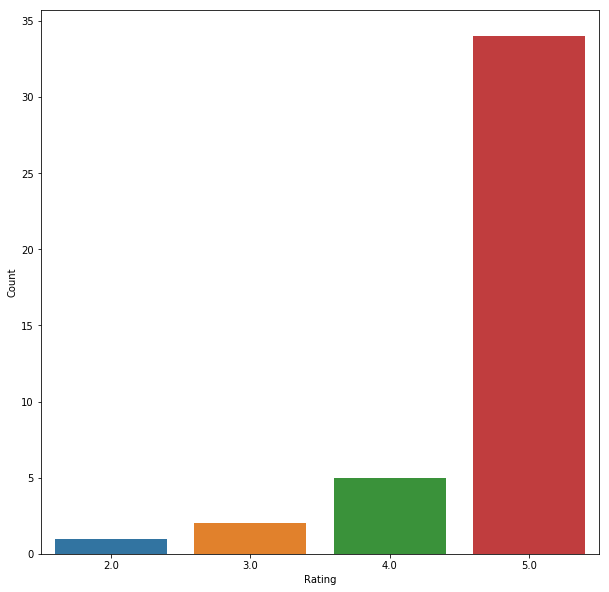

In [404]:
user_ratings_dist_plot('A1Y09QLADQYQJG')

Let's look at the mean rating distribution

In [405]:
user_mean_rating = users_df[(users_df.UserRatingsMean <= 3.5) & (users_df.UserRatingsMean >= 2.5)]

In [406]:
user_mean_rating.shape

(86574, 2)

In [407]:
user_mean_rating.head(5)

,UserRatingsMean,UserRatingsCount
reviewerID,,
A3L61G6N7AT8N2,3.280000,25
A24PK4Q70CS0N0,2.850000,20
ACMNKX5UIEYYG,3.111111,18
AB39HXPQYD7VN,3.312500,16
A2OPFLMNQW1YS3,3.133333,15


In [408]:
def user_ratings_dist_plot(reviewerID):
    df_user = sample_df[sample_df['reviewerID'] == reviewerID]['overall']
    df_new = pd.DataFrame(df_user).reset_index()
    df = df_new.groupby(['overall'], as_index=False).count()
    df1 = df.add_suffix('_Count')
    df1.rename(columns={'overall_Count': 'Rating', 'index_Count': 'Count'}, inplace=True)
    plt.figure(figsize=(10,10))
    ax = sns.barplot(x='Rating', y="Count", data=df1)
                        
    plt.show()

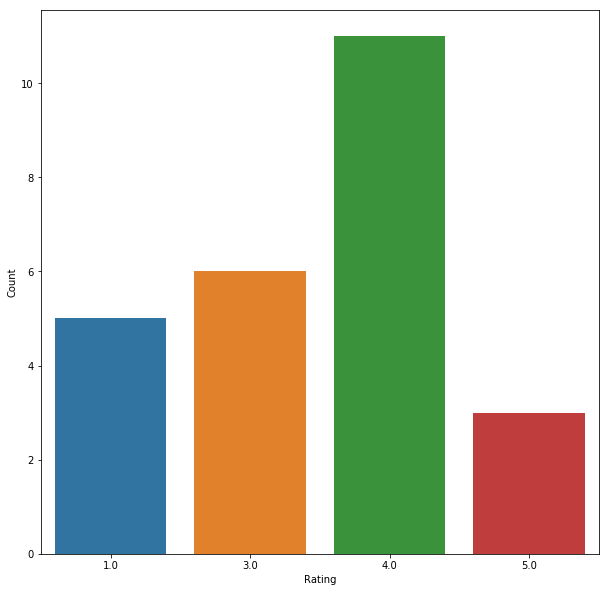

In [410]:
user_ratings_dist_plot('A3L61G6N7AT8N2')